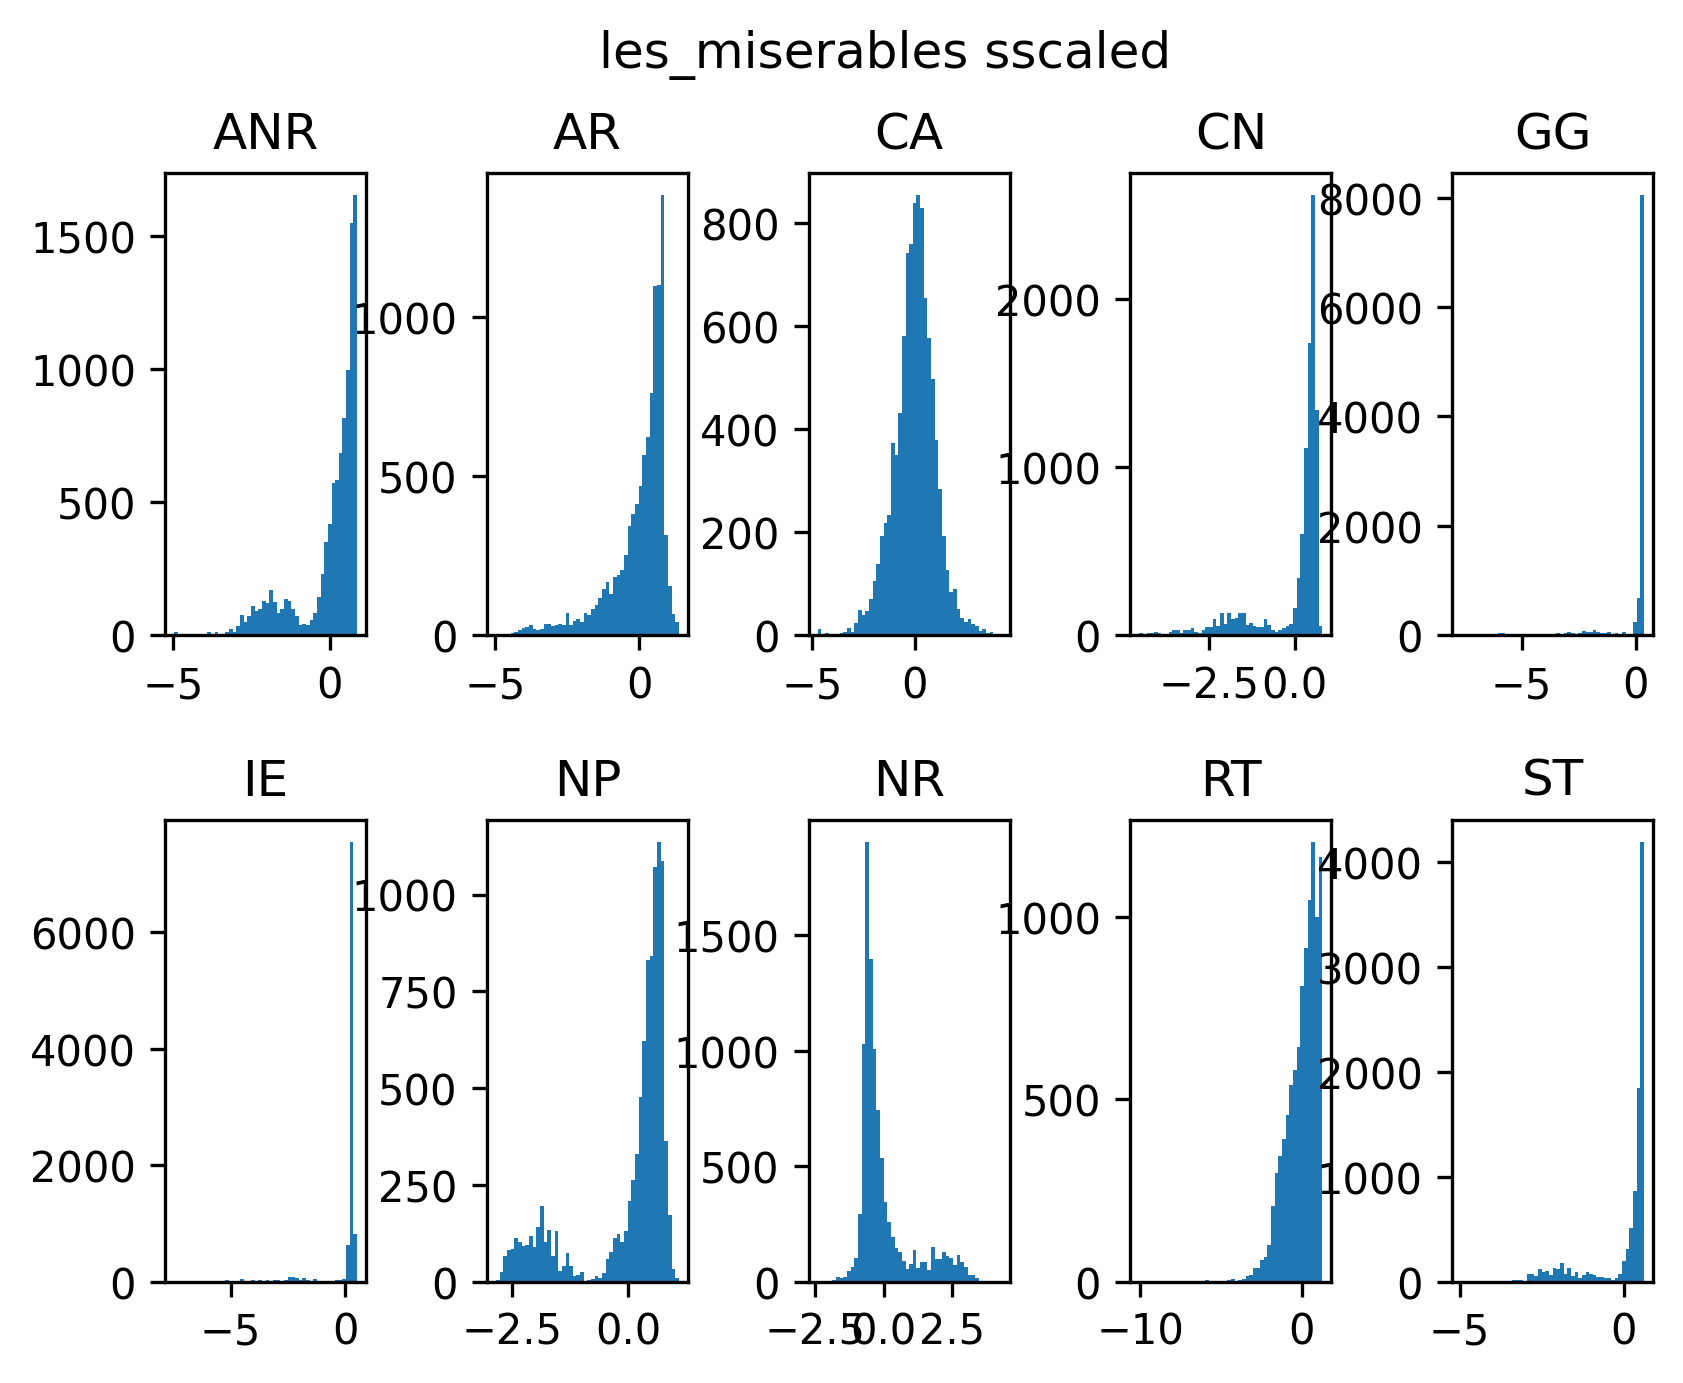

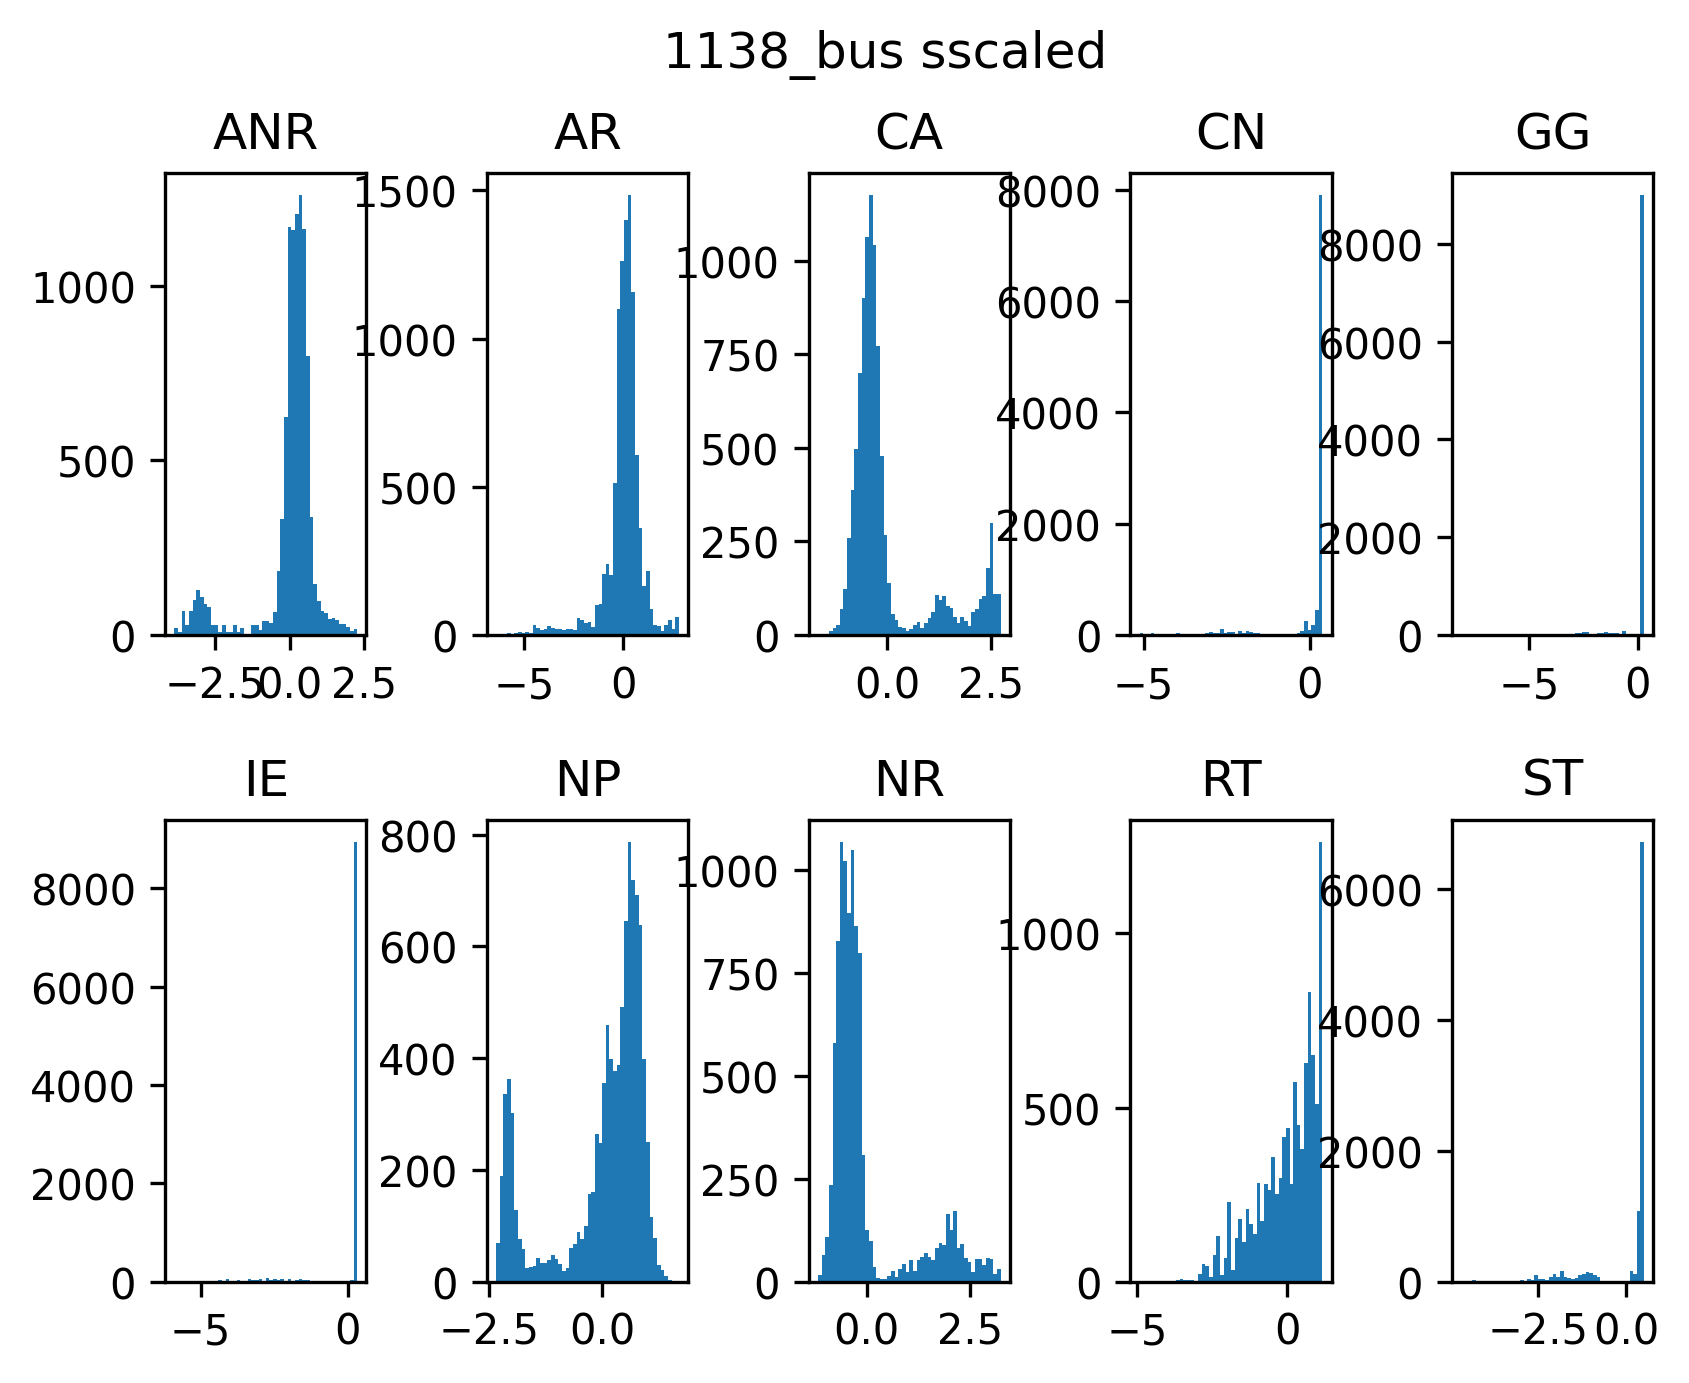

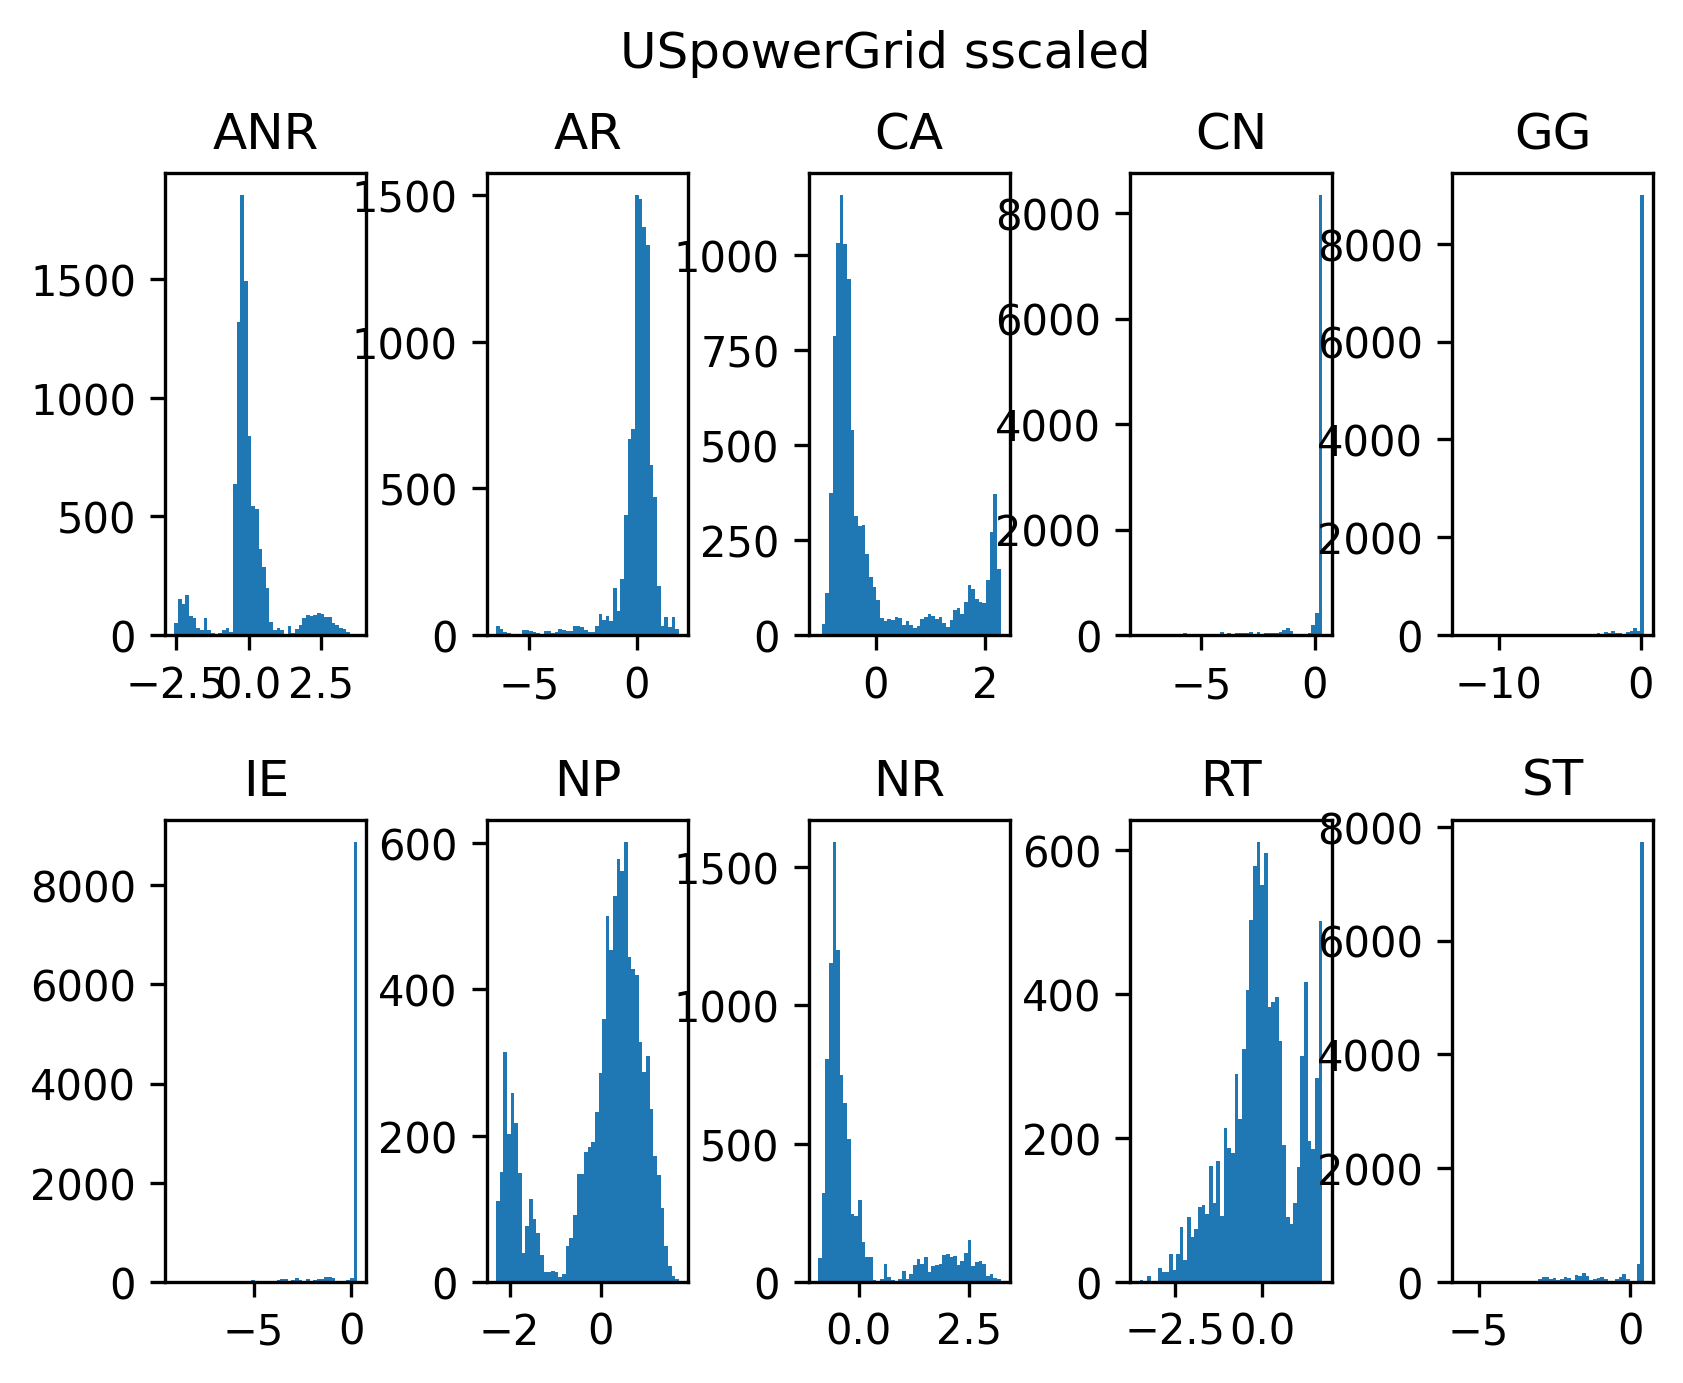

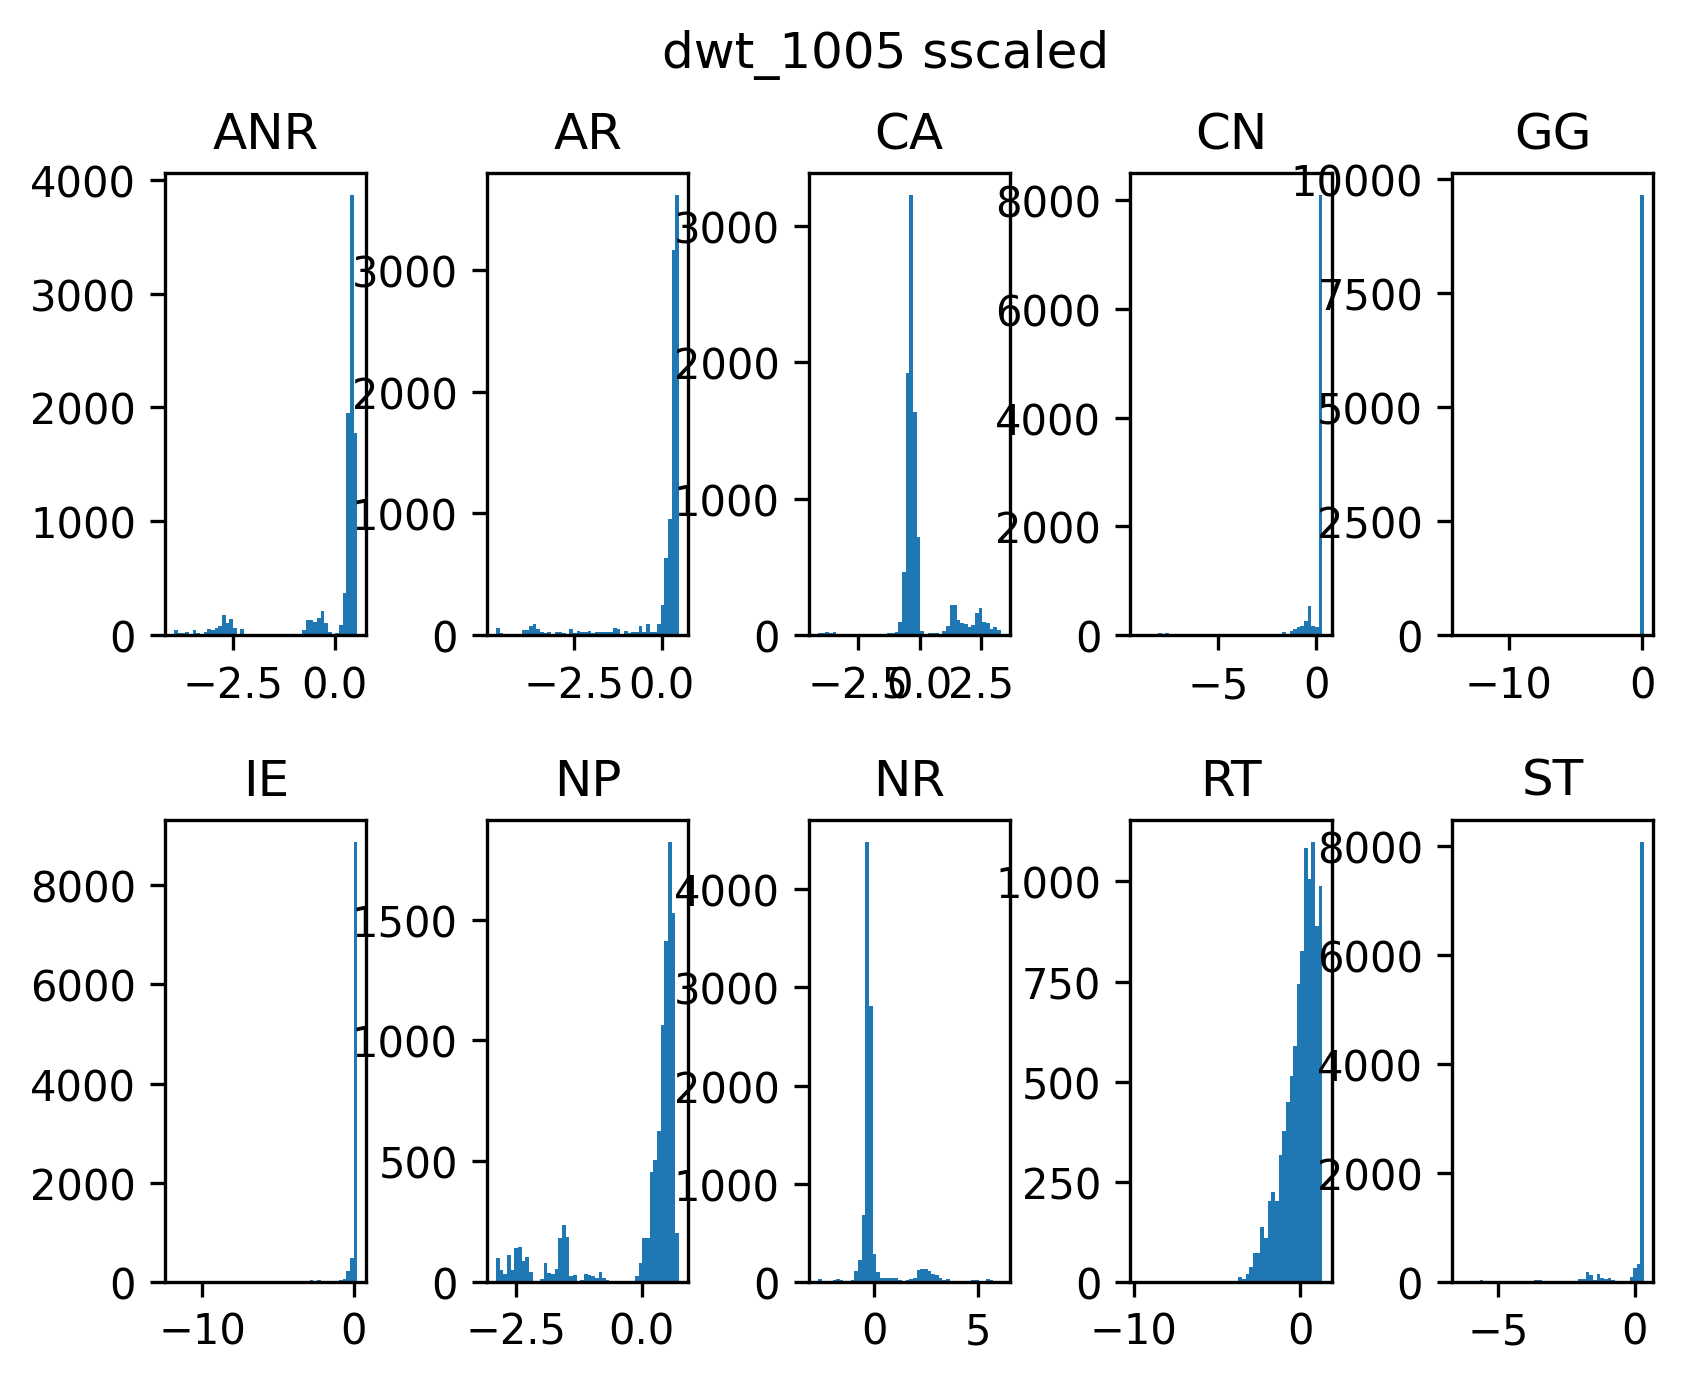

In [1]:
import pandas as pd
from ex_utils.share import ex_path, generate_sscalers, generate_mmscalers
from ex_utils.config.quality_metrics import qm_names, qm_name_abbreviations
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

n_bins = 50

for D in ["les_miserables", "1138_bus", "USpowerGrid", "dwt_1005"]:
    seed = 1
    n_split = 10
    data_seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    df_paths = [
        ex_path.joinpath(f"data/grid/{D}/seed={data_seed}_n={n_split}.pkl")
        for data_seed in data_seeds
    ]
    df = pd.read_pickle(
        ex_path.joinpath(
            f"data/grid/{D}/seed={','.join(map(str, data_seeds))}_n={n_split}.pkl"
        )
    )

    # # normal
    # nrows = 2
    # ncols = 5
    # fig, axes = plt.subplots(
    #     nrows=nrows, ncols=ncols, dpi=300, facecolor="white", squeeze=False
    # )
    # fig.suptitle(D)
    # plt.subplots_adjust(wspace=0.6, hspace=0.4)

    # i = 0
    # for nrow in range(nrows):
    #     for ncol in range(ncols):
    #         qm_name = qm_names[i]
    #         axes[nrow][ncol].hist(df[f"values_{qm_name}"], bins=n_bins)
    #         axes[nrow][ncol].set_title(f"{qm_name_abbreviations[qm_name]}")
    #         i += 1

    # plt.show()

    # # qq plot
    # nrows = 2
    # ncols = 5
    # fig, axes = plt.subplots(
    #     nrows=nrows, ncols=ncols, dpi=300, facecolor="white", squeeze=False
    # )
    # fig.suptitle(D)
    # plt.subplots_adjust(wspace=0.6, hspace=0.4)

    # i = 0
    # for nrow in range(nrows):
    #     for ncol in range(ncols):
    #         qm_name = qm_names[i]
    #         stats.probplot(df[f"values_{qm_name}"], plot=axes[nrow][ncol])
    #         axes[nrow][ncol].set_title(f"{qm_name_abbreviations[qm_name]}")
    #         i += 1

    # plt.show()

    # ss
    nrows = 2
    ncols = 5
    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, dpi=300, facecolor="white", squeeze=False
    )
    fig.suptitle(f"{D} sscaled")
    plt.subplots_adjust(wspace=0.6, hspace=0.4)

    i = 0
    for nrow in range(nrows):
        for ncol in range(ncols):
            qm_name = qm_names[i]
            axes[nrow][ncol].hist(
                df[f"values_sscaled_{qm_name}"],
                bins=n_bins,
            )
            axes[nrow][ncol].set_title(f"{qm_name_abbreviations[qm_name]}")
            i += 1

    plt.show()

    # # mmscaled
    # nrows = 2
    # ncols = 5
    # fig, axes = plt.subplots(
    #     nrows=nrows, ncols=ncols, dpi=300, facecolor="white", squeeze=False
    # )
    # fig.suptitle(f"{D} mmscaled")
    # plt.subplots_adjust(wspace=0.6, hspace=0.4)

    # i = 0
    # for nrow in range(nrows):
    #     for ncol in range(ncols):
    #         qm_name = qm_names[i]
    #         axes[nrow][ncol].hist(
    #             df[f"values_mmscaled_{qm_name}"],
    #             bins=n_bins,
    #         )
    #         axes[nrow][ncol].set_title(f"{qm_name_abbreviations[qm_name]}")
    #         i += 1

    # plt.show()

    # display(df.describe())

In [2]:
i = 0
for nrow in range(nrows):
    for ncol in range(ncols):
        qm_name = qm_names[i]
        d = (
            sscalers[qm_name]
            .transform(df[f"values_{qm_name}"].values.reshape(-1, 1))
            .reshape(1, -1)
        )
        for dd in d:
            print(sorted(dd))
        i += 1
print(qm_names)

NameError: name 'sscalers' is not defined

In [ ]:
i = 0
for nrow in range(nrows):
    for ncol in range(ncols):
        qm_name = qm_names[i]
        d = (
            mmscalers[qm_name]
            .transform(df[f"values_{qm_name}"].values.reshape(-1, 1))
            .reshape(1, -1)
        )
        for dd in d:
            print(sorted(dd))
        i += 1
print(qm_names)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013603126955255007, 0.013603126955255007, 0.013603126955255007, 0.013603126955255007, 0.013603126955255007, 0.013603126955255007, 0.013603126955255007, 0.013603126955255007, 0.013603126955255007, 0.013603126955255007, 0.015635369197344318, 0.015635369197344318, 0.015635369197344318, 0.015635369197344318, 0.015635369197344318, 0.015635369197344318, 0.015635369197344318, 0.015635369197344318, 0.015635369197344318, 0.015635369197344318, 0.017762775518165963, 0.017762775518165963, 0.017762775518165963, 0.017762775518165963, 0.017762775518165963, 0.017762775518165963, 0.017762775518165963, 0.017762775518165963, 0.017762775518165963, 0.017762775518165963, 0.018921939218613737, 0.018921939218613737, 0.018921939218613737, 0.018921939218613737, 0.018921939218613737, 0.018921939218613737, 0.018921939218613737, 0.018921939218613737, 0.018921939218613737, 0.018921939218613737, 0.0204368564844164, 0.0204368564844164, 0.0204368564844164, 0.0204368

In [ ]:
[
    "-angular_resolution",
    "-aspect_ratio",
    "-crossing_angle",
    "crossing_number",
    "gabriel_graph_property",
    "ideal_edge_length",
    "-neighborhood_preservation",
    "-node_resolution",
    "runtime",
    "stress",
]

['-angular_resolution',
 '-aspect_ratio',
 '-crossing_angle',
 'crossing_number',
 'gabriel_graph_property',
 'ideal_edge_length',
 '-neighborhood_preservation',
 '-node_resolution',
 'runtime',
 'stress']

In [ ]:
df.describe()

,index,params_pivots,params_iterations,params_eps,values_angular_resolution,values_aspect_ratio,values_crossing_number,values_gabriel_graph_property,values_ideal_edge_length,values_neighborhood_preservation,values_node_resolution,values_stress,values_crossing_angle,values_runtime,seed,edge_weight
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.0
mean,499.500000,50.500000,100.100000,0.248181,-7080.680334,0.828912,-9.846575e+04,-2.802690e+09,-5.135775e+04,0.028229,-7.839644e+09,-1.351853e+06,-0.553417,-2.130472,4.500000,30.0
std,288.689425,31.596674,63.350543,0.307423,522.508213,0.083761,2.205628e+05,1.105254e+10,1.617913e+05,0.012088,1.793704e+09,1.402597e+06,0.089887,1.208683,2.872425,0.0
min,0.000000,1.000000,1.000000,0.010000,-8418.927734,0.279785,-1.800179e+06,-1.425428e+11,-1.518818e+06,0.000493,-9.485661e+09,-9.166693e+06,-0.648787,-6.370501,0.000000,30.0
25%,249.750000,23.000000,45.000000,0.027826,-7244.296265,0.817255,-3.532600e+04,-2.176808e+07,-3.877589e+03,0.024390,-8.878734e+09,-8.344258e+05,-0.611770,-2.787943,2.000000,30.0
50%,499.500000,50.500000,100.000000,0.103291,-7154.962158,0.845665,-2.899150e+04,-1.126638e+07,-3.060075e+03,0.031965,-8.623883e+09,-7.560788e+05,-0.597600,-2.151097,4.500000,30.0
75%,749.250000,78.000000,155.000000,0.359381,-6976.782715,0.868884,-2.652500e+04,-8.400520e+06,-2.759912e+03,0.036426,-7.888768e+09,-7.304322e+05,-0.543225,-1.418372,7.000000,30.0
max,999.000000,100.000000,200.000000,1.000000,-5124.863770,0.994899,-2.367200e+04,-1.994329e+06,-3.504236e+01,0.048998,-2.092608e+09,-7.072212e+05,-0.347432,-0.032308,9.000000,30.0


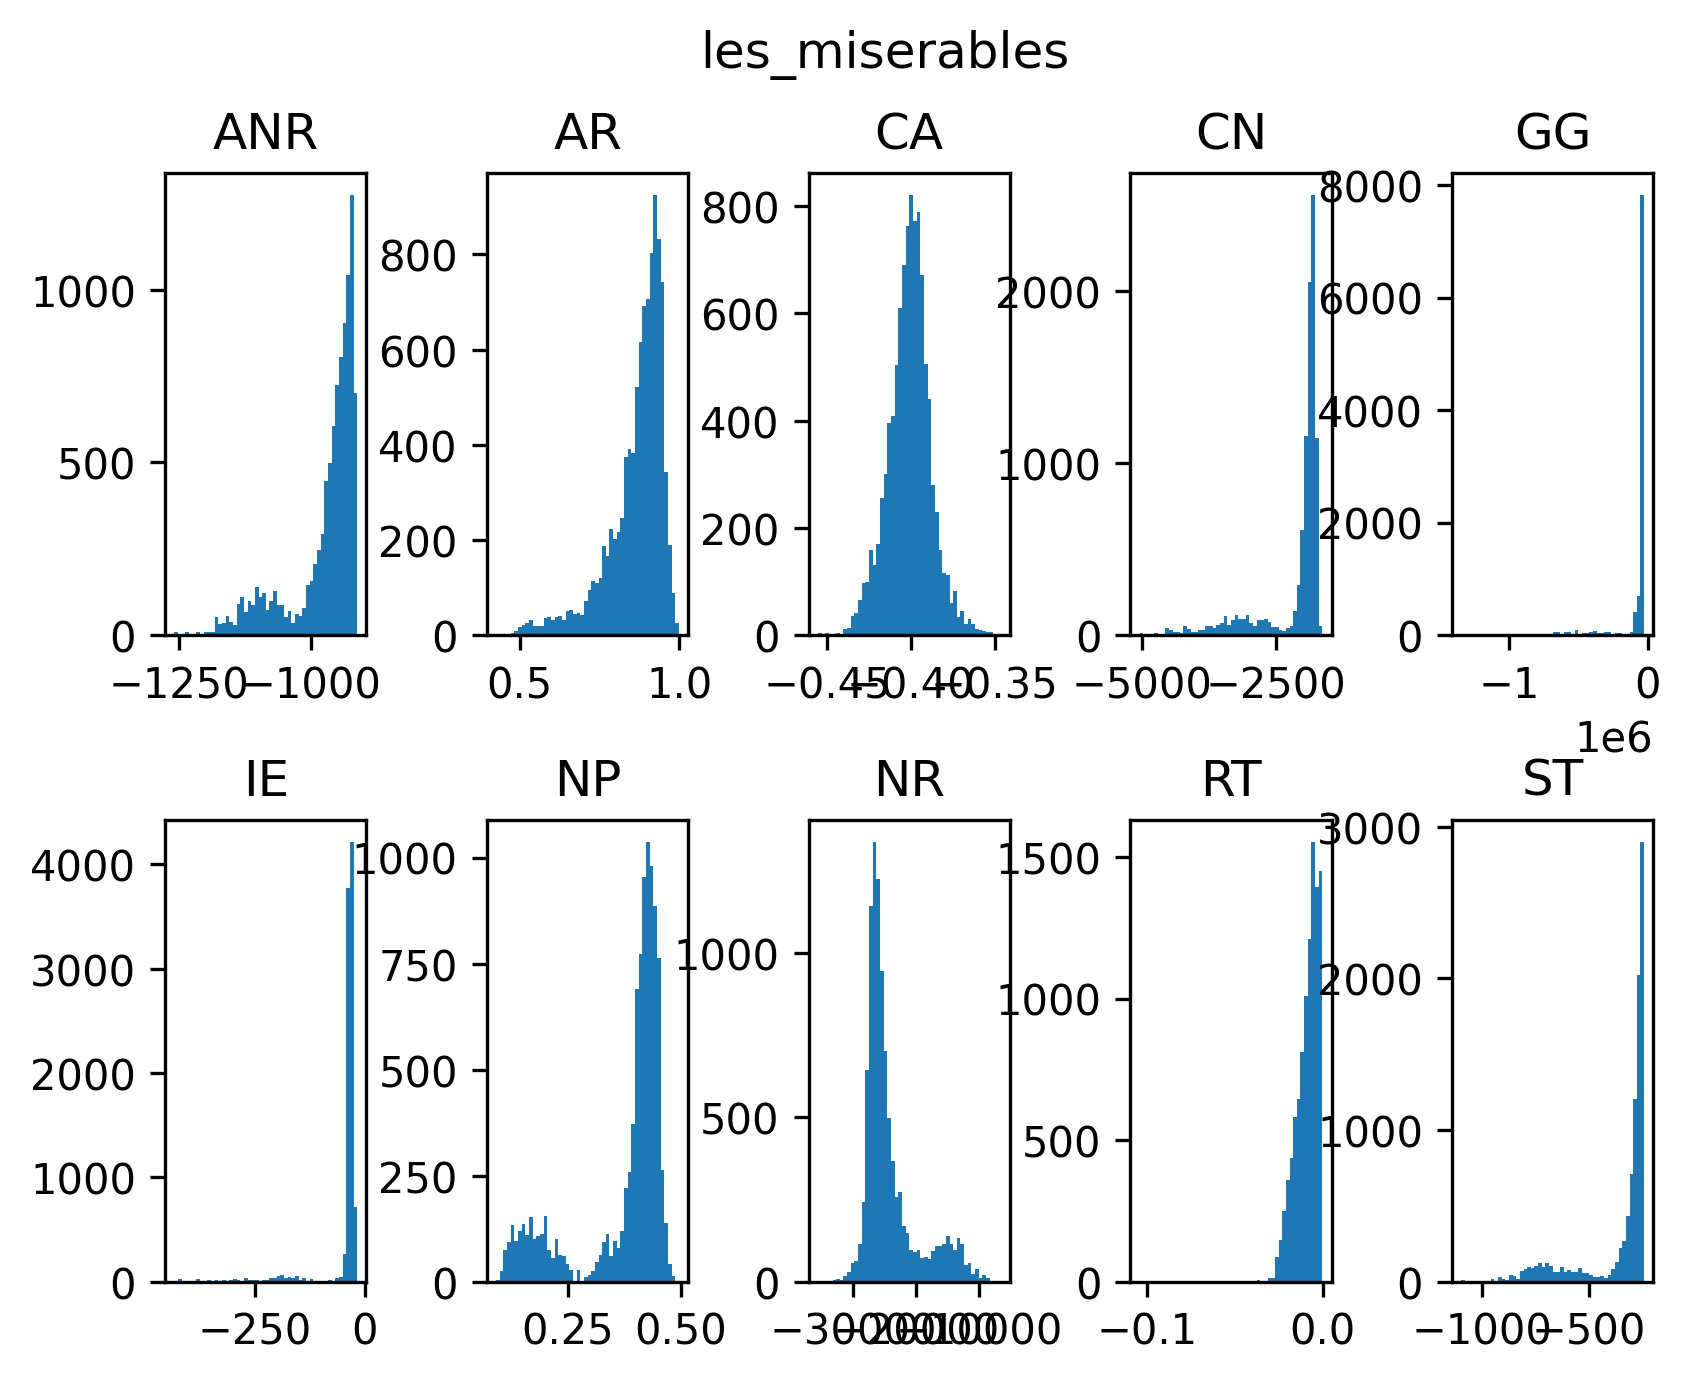

FileNotFoundError: [Errno 2] No such file or directory: '/Users/fuga_takata/dev/vdslab-project/hyperparameter-in-graph-drawing/experiments/optimization/data/grid/percentage_pivots/1138_bus/seed=0_n=10.pkl'

In [2]:
import pandas as pd
from ex_utils.share import ex_path, generate_sscalers, generate_mmscalers
from ex_utils.config.quality_metrics import qm_names, qm_name_abbreviations
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

n_bins = 50

for D in ["les_miserables", "1138_bus", "USpowerGrid", "dwt_1005"]:
    seed = 1
    n_split = 10
    data_seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    df_paths = [
        ex_path.joinpath(
            f"data/grid/percentage_pivots/{D}/seed={data_seed}_n={n_split}.pkl"
        )
        for data_seed in data_seeds
    ]
    # df = pd.read_pickle(
    #     ex_path.joinpath(
    #         f"data/grid/{D}/seed={','.join(map(str, data_seeds))}_n={n_split}.pkl"
    #     )
    # )
    df = pd.concat(
        [pd.read_pickle(df_path) for df_path in df_paths]
    ).reset_index()

    # normal
    nrows = 2
    ncols = 5
    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, dpi=300, facecolor="white", squeeze=False
    )
    fig.suptitle(D)
    plt.subplots_adjust(wspace=0.6, hspace=0.4)

    i = 0
    for nrow in range(nrows):
        for ncol in range(ncols):
            qm_name = qm_names[i]
            axes[nrow][ncol].hist(df[f"values_{qm_name}"], bins=n_bins)
            axes[nrow][ncol].set_title(f"{qm_name_abbreviations[qm_name]}")
            i += 1

    plt.show()

    # # qq plot
    # nrows = 2
    # ncols = 5
    # fig, axes = plt.subplots(
    #     nrows=nrows, ncols=ncols, dpi=300, facecolor="white", squeeze=False
    # )
    # fig.suptitle(D)
    # plt.subplots_adjust(wspace=0.6, hspace=0.4)

    # i = 0
    # for nrow in range(nrows):
    #     for ncol in range(ncols):
    #         qm_name = qm_names[i]
    #         stats.probplot(df[f"values_{qm_name}"], plot=axes[nrow][ncol])
    #         axes[nrow][ncol].set_title(f"{qm_name_abbreviations[qm_name]}")
    #         i += 1

    # plt.show()

    # # ss
    # nrows = 2
    # ncols = 5
    # fig, axes = plt.subplots(
    #     nrows=nrows, ncols=ncols, dpi=300, facecolor="white", squeeze=False
    # )
    # fig.suptitle(f"{D} sscaled")
    # plt.subplots_adjust(wspace=0.6, hspace=0.4)

    # i = 0
    # for nrow in range(nrows):
    #     for ncol in range(ncols):
    #         qm_name = qm_names[i]
    #         axes[nrow][ncol].hist(
    #             df[f"values_sscaled_{qm_name}"],
    #             bins=n_bins,
    #         )
    #         axes[nrow][ncol].set_title(f"{qm_name_abbreviations[qm_name]}")
    #         i += 1

    # plt.show()

    # # mmscaled
    # nrows = 2
    # ncols = 5
    # fig, axes = plt.subplots(
    #     nrows=nrows, ncols=ncols, dpi=300, facecolor="white", squeeze=False
    # )
    # fig.suptitle(f"{D} mmscaled")
    # plt.subplots_adjust(wspace=0.6, hspace=0.4)

    # i = 0
    # for nrow in range(nrows):
    #     for ncol in range(ncols):
    #         qm_name = qm_names[i]
    #         axes[nrow][ncol].hist(
    #             df[f"values_mmscaled_{qm_name}"],
    #             bins=n_bins,
    #         )
    #         axes[nrow][ncol].set_title(f"{qm_name_abbreviations[qm_name]}")
    #         i += 1

    # plt.show()

    # display(df.describe())